## Imports

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif,RFECV,SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.combine import SMOTETomek
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,confusion_matrix

Reading the child and adult data

In [3]:
child=pd.read_csv('Autism-Child-Data.csv')
adult=pd.read_csv('Autism-Adult-Data.csv')

In [4]:
child.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'0',...,b'm',b'Others',b'no',b'no',b'Jordan',b'no',5.0,b'4-11 years',b'Parent',b'NO'
1,b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'0',...,b'm',b'Middle Eastern ',b'no',b'no',b'Jordan',b'no',5.0,b'4-11 years',b'Parent',b'NO'
2,b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'1',b'0',b'0',...,b'm',b'?',b'no',b'no',b'Jordan',b'yes',5.0,b'4-11 years',b'?',b'NO'
3,b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',...,b'f',b'?',b'yes',b'no',b'Jordan',b'no',4.0,b'4-11 years',b'?',b'NO'
4,b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',...,b'm',b'Others',b'yes',b'no',b'United States',b'no',10.0,b'4-11 years',b'Parent',b'YES'


In [5]:
adult.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'0',...,b'f',b'White-European',b'no',b'no',b'United States',b'no',6.0,b'18 and more',b'Self',b'NO'
1,b'1',b'1',b'0',b'1',b'0',b'0',b'0',b'1',b'0',b'1',...,b'm',b'Latino',b'no',b'yes',b'Brazil',b'no',5.0,b'18 and more',b'Self',b'NO'
2,b'1',b'1',b'0',b'1',b'1',b'0',b'1',b'1',b'1',b'1',...,b'm',b'Latino',b'yes',b'yes',b'Spain',b'no',8.0,b'18 and more',b'Parent',b'YES'
3,b'1',b'1',b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'1',...,b'f',b'White-European',b'no',b'yes',b'United States',b'no',6.0,b'18 and more',b'Self',b'NO'
4,b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'0',b'0',...,b'f',b'?',b'no',b'no',b'Egypt',b'no',2.0,b'18 and more',b'?',b'NO'


In [6]:
child.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [7]:
adult.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [8]:
child.columns==adult.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

As we can see both the dataframes has same columns, so we can combine both the data to create a larger data

In [9]:
child.shape,adult.shape

((292, 21), (704, 21))

In [10]:
df=pd.concat([child,adult],axis=0)

In [11]:
df.shape

(996, 21)

In [13]:
df.to_csv('final-data.csv',index=False)

In [14]:
df=pd.read_csv('final-data.csv')
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'0',...,b'm',b'Others',b'no',b'no',b'Jordan',b'no',5.0,b'4-11 years',b'Parent',b'NO'
1,b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'0',...,b'm',b'Middle Eastern ',b'no',b'no',b'Jordan',b'no',5.0,b'4-11 years',b'Parent',b'NO'
2,b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'1',b'0',b'0',...,b'm',b'?',b'no',b'no',b'Jordan',b'yes',5.0,b'4-11 years',b'?',b'NO'
3,b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',...,b'f',b'?',b'yes',b'no',b'Jordan',b'no',4.0,b'4-11 years',b'?',b'NO'
4,b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',...,b'm',b'Others',b'yes',b'no',b'United States',b'no',10.0,b'4-11 years',b'Parent',b'YES'


## Exploratory Data Analysis

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         996 non-null    object 
 1   A2_Score         996 non-null    object 
 2   A3_Score         996 non-null    object 
 3   A4_Score         996 non-null    object 
 4   A5_Score         996 non-null    object 
 5   A6_Score         996 non-null    object 
 6   A7_Score         996 non-null    object 
 7   A8_Score         996 non-null    object 
 8   A9_Score         996 non-null    object 
 9   A10_Score        996 non-null    object 
 10  age              990 non-null    float64
 11  gender           996 non-null    object 
 12  ethnicity        996 non-null    object 
 13  jundice          996 non-null    object 
 14  austim           996 non-null    object 
 15  contry_of_res    996 non-null    object 
 16  used_app_before  996 non-null    object 
 17  result          

In [15]:
df.shape

(996, 21)

In [16]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [18]:
for feature in df.columns:
    print(feature,len(df[feature].unique()))

A1_Score 2
A2_Score 2
A3_Score 2
A4_Score 2
A5_Score 2
A6_Score 2
A7_Score 2
A8_Score 2
A9_Score 2
A10_Score 2
age 55
gender 2
ethnicity 12
jundice 2
austim 2
contry_of_res 83
used_app_before 2
result 11
age_desc 2
relation 7
Class/ASD 2


Checking for duplicate records

In [19]:
df.duplicated().sum()

7

We see that there are few duplicated records in the dataframe which should be droped

In [ ]:
df.drop_duplicates(inplace=True)

In [20]:
df.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                6
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [21]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
question_features=[feature for feature in df.columns if 'Score' in feature]
numerical_features=[feature for feature in df.columns if feature not in categorical_features]

In [22]:
print(df.groupby(['A1_Score'])['Class/ASD'].value_counts()[2:])
print(df.groupby(['A1_Score'])['A1_Score'].value_counts())
# for feature in categorical_features:
#     df.groupby(feature)[]

A1_Score  Class/ASD
b'1'      b'NO'        398
          b'YES'       295
Name: Class/ASD, dtype: int64
A1_Score  A1_Score
b'0'      b'0'        303
b'1'      b'1'        693
Name: A1_Score, dtype: int64


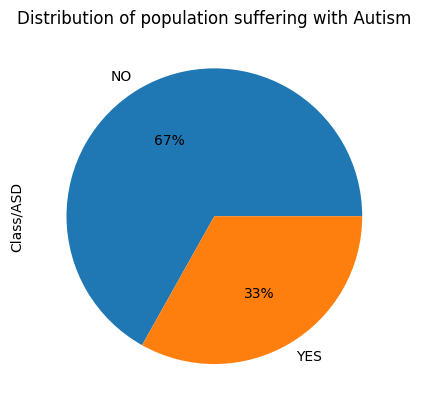

In [23]:
df.groupby(['Class/ASD'])['Class/ASD'].value_counts().plot(kind='pie',autopct='%2.0f%%',labels=['NO','YES'])
plt.title("Distribution of population suffering with Autism")
plt.show()

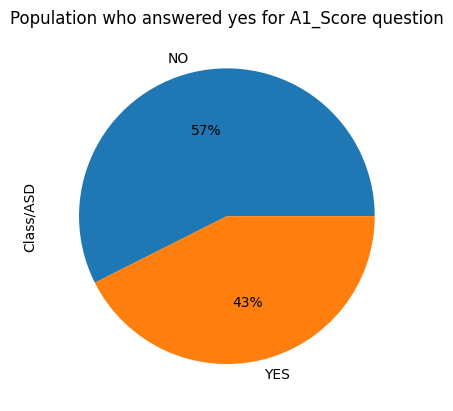

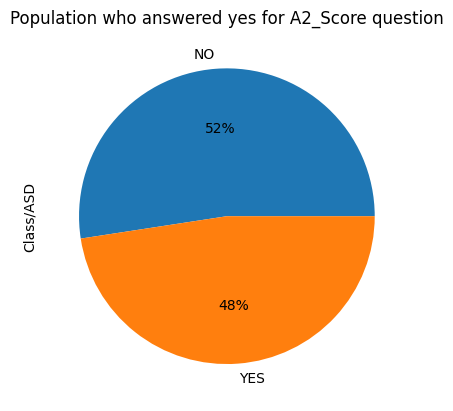

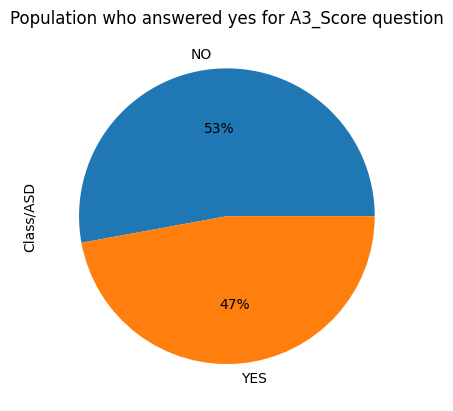

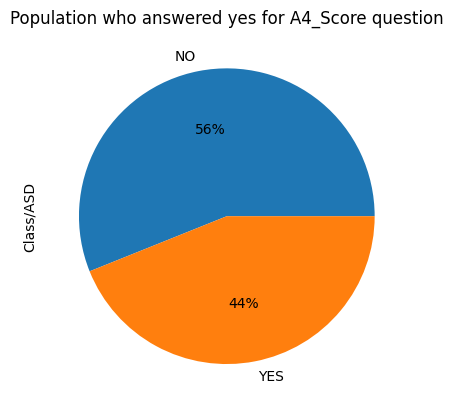

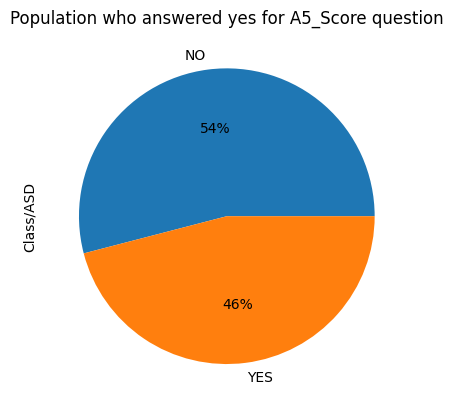

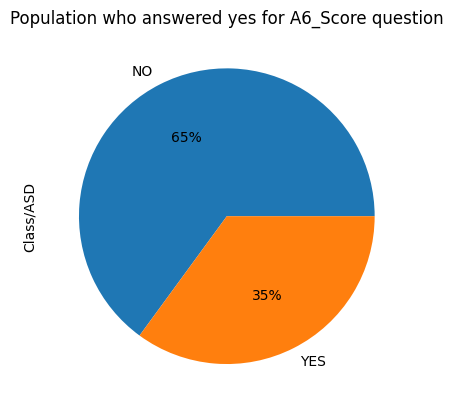

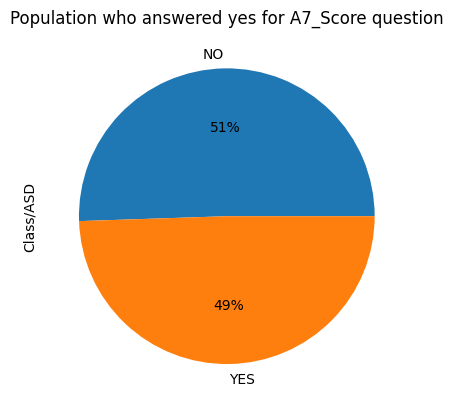

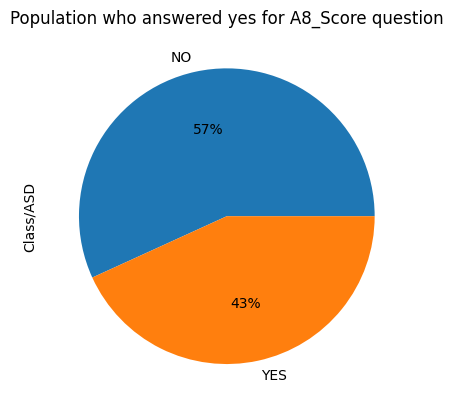

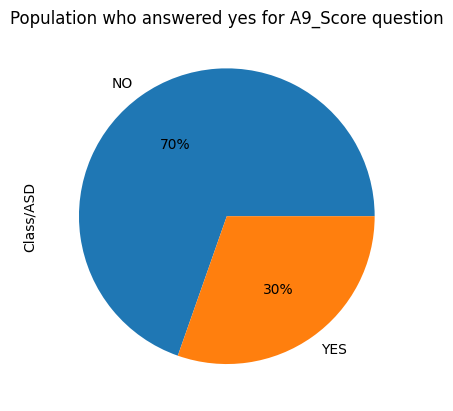

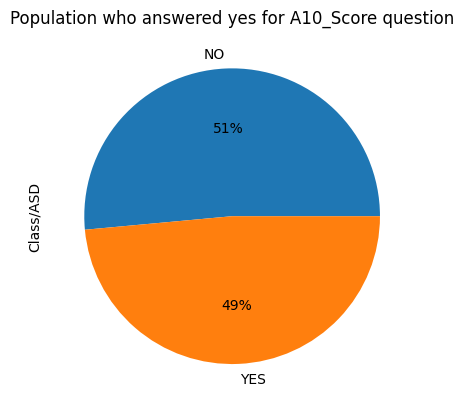

In [24]:
for feature in question_features:
    df.groupby([feature])['Class/ASD'].value_counts()[2:].plot(kind='pie',autopct='%2.0f%%',labels=['NO','YES'])
    plt.title(f"Population who answered yes for {feature.split('_')[0]} question")
    plt.show()

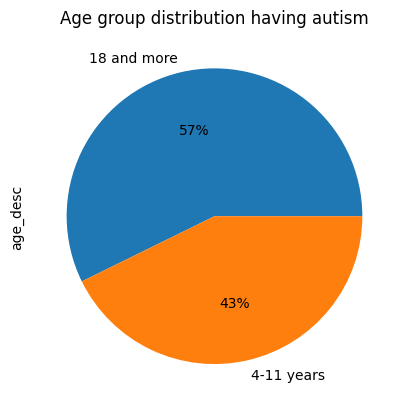

In [25]:
df.groupby('Class/ASD')['age_desc'].value_counts()[2:].plot(kind='pie',autopct='%2.0f%%',labels=['18 and more','4-11 years'])
plt.title("Age group distribution having autism")
plt.show()

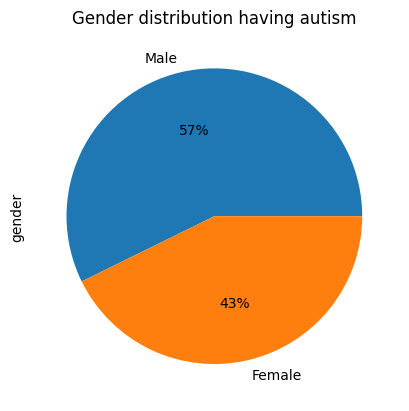

In [26]:
df.groupby('Class/ASD')['gender'].value_counts()[2:].plot(kind='pie',autopct='%2.0f%%',labels=['Male','Female'])
plt.title("Gender distribution having autism")
plt.show()

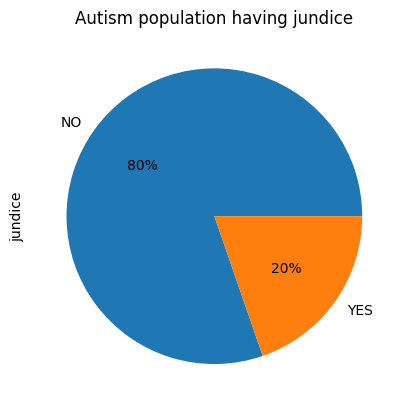

In [27]:
df.groupby('Class/ASD')['jundice'].value_counts()[2:].plot(kind='pie',autopct='%2.0f%%',labels=['NO','YES'])
plt.title("Autism population having jundice")
plt.show()

In [28]:
for feature in categorical_features:
    print(f"{feature} vs Class/ASD")
    print(pd.crosstab(df[feature],df['Class/ASD']))
    print("\n")

A1_Score vs Class/ASD
Class/ASD  b'NO'  b'YES'
A1_Score                
b'0'         268      35
b'1'         398     295


A2_Score vs Class/ASD
Class/ASD  b'NO'  b'YES'
A2_Score                
b'0'         417     104
b'1'         249     226


A3_Score vs Class/ASD
Class/ASD  b'NO'  b'YES'
A3_Score                
b'0'         412      45
b'1'         254     285


A4_Score vs Class/ASD
Class/ASD  b'NO'  b'YES'
A4_Score                
b'0'         442      44
b'1'         224     286


A5_Score vs Class/ASD
Class/ASD  b'NO'  b'YES'
A5_Score                
b'0'         405      23
b'1'         261     307


A6_Score vs Class/ASD
Class/ASD  b'NO'  b'YES'
A6_Score                
b'0'         523      65
b'1'         143     265


A7_Score vs Class/ASD
Class/ASD  b'NO'  b'YES'
A7_Score                
b'0'         433      92
b'1'         233     238


A8_Score vs Class/ASD
Class/ASD  b'NO'  b'YES'
A8_Score                
b'0'         324      70
b'1'         342     260


A9_Score

In [29]:
df.drop(['age'],axis=1,inplace=True)

Data Preprocessing

In [30]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender', 'ethnicity',
       'jundice', 'austim', 'contry_of_res', 'used_app_before', 'result',
       'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [31]:
a1_Score_encoder=LabelEncoder()
df['A1_Score']=a1_Score_encoder.fit_transform(df['A1_Score'])
a2_Score_encoder=LabelEncoder()
df['A2_Score']=a2_Score_encoder.fit_transform(df['A2_Score'])
a3_Score_encoder=LabelEncoder()
df['A3_Score']=a3_Score_encoder.fit_transform(df['A3_Score'])
a4_Score_encoder=LabelEncoder()
df['A4_Score']=a4_Score_encoder.fit_transform(df['A4_Score'])
a5_Score_encoder=LabelEncoder()
df['A5_Score']=a5_Score_encoder.fit_transform(df['A5_Score'])
a6_Score_encoder=LabelEncoder()
df['A6_Score']=a6_Score_encoder.fit_transform(df['A6_Score'])
a7_Score_encoder=LabelEncoder()
df['A7_Score']=a7_Score_encoder.fit_transform(df['A7_Score'])
a8_Score_encoder=LabelEncoder()
df['A8_Score']=a8_Score_encoder.fit_transform(df['A8_Score'])
a9_Score_encoder=LabelEncoder()
df['A9_Score']=a9_Score_encoder.fit_transform(df['A9_Score'])
a10_Score_encoder=LabelEncoder()
df['A10_Score']=a10_Score_encoder.fit_transform(df['A10_Score'])
a10_Score_encoder=LabelEncoder()
df['A10_Score']=a10_Score_encoder.fit_transform(df['A10_Score'])
a10_Score_encoder=LabelEncoder()
df['A10_Score']=a10_Score_encoder.fit_transform(df['A10_Score'])
a10_Score_encoder=LabelEncoder()
df['A10_Score']=a10_Score_encoder.fit_transform(df['A10_Score'])
gender_encoder=LabelEncoder()
df['gender']=gender_encoder.fit_transform(df['gender'])
ethnicity_encoder=LabelEncoder()
df['ethnicity']=ethnicity_encoder.fit_transform(df['ethnicity'])
jundice_encoder=LabelEncoder()
df['jundice']=jundice_encoder.fit_transform(df['jundice'])
austim_encoder=LabelEncoder()
df['austim']=austim_encoder.fit_transform(df['austim'])
contry_of_res_encoder=LabelEncoder()
df['contry_of_res']=contry_of_res_encoder.fit_transform(df['contry_of_res'])
age_desc_encoder=LabelEncoder()
df['age_desc']=age_desc_encoder.fit_transform(df['age_desc'])
relation_encoder=LabelEncoder()
df['relation']=contry_of_res_encoder.fit_transform(df['relation'])
asd_encoder=LabelEncoder()
df['Class/ASD']=asd_encoder.fit_transform(df['Class/ASD'])

In [32]:
df.drop(['result','used_app_before'],axis=1,inplace=True)

In [33]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender,ethnicity,jundice,austim,contry_of_res,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,1,6,0,0,43,1,3,0
1,1,1,0,0,1,1,0,1,0,0,1,5,0,0,43,1,3,0
2,1,1,0,0,0,1,1,1,0,0,1,0,0,0,43,1,0,0
3,0,1,0,0,1,1,0,0,0,1,0,0,1,0,43,1,0,0
4,1,1,1,1,1,1,1,1,1,1,1,6,1,0,80,1,3,1


In [34]:
x=df.drop(['Class/ASD'],axis=1)
y=df['Class/ASD']

Scaling the data

In [35]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

### Sampling

As the data is imbalanced we will use a hybrid method which combines Undersampling and Oversampling method to maintain the balance between classes

In [37]:
smote = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [38]:
X_train_resampled.shape

(1058, 17)

In [39]:
print('Before resampling:')
print(y_train.value_counts())
print('\nAfter resampling:')
print(pd.Series(y_train_resampled).value_counts())

Before resampling:
0    532
1    264
Name: Class/ASD, dtype: int64

After resampling:
0    529
1    529
Name: Class/ASD, dtype: int64


## Feature Selection

Univariate feature selection using SelectKBest

In [40]:
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X_train_resampled, y_train_resampled)
print('Selected feature indices:', df.drop(['Class/ASD'],axis=1).columns[selector.get_support(indices=True)])

Selected feature indices: Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score'],
      dtype='object')


Feature selection using tree-based models with SelectFromModel:

In [41]:
estimator = RandomForestClassifier()
selector = SelectFromModel(estimator)
selector.fit(X_train_resampled, y_train_resampled)
print('Selected feature indices:', df.drop(['Class/ASD'],axis=1).columns[selector.get_support(indices=True)])

Selected feature indices: Index(['A1_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A9_Score',
       'A10_Score'],
      dtype='object')


Correlation-based feature selection:

In [42]:
correlation_scores, p_values = f_classif(X_train_resampled, y_train_resampled)
correlation_df = pd.DataFrame({'Feature': df.drop(['Class/ASD'],axis=1).columns, 'Correlation_Score': correlation_scores, 'P-Value': p_values})
correlation_df = correlation_df.sort_values(by=['Correlation_Score'], ascending=False)
k = 10
top_k_features = list(correlation_df['Feature'][:k])
X_top_k = df.drop(['Class/ASD'],axis=1)[top_k_features]
print("Top {} Features: {}".format(k,top_k_features))

Top 10 Features: ['A6_Score', 'A9_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A10_Score', 'A1_Score', 'A7_Score', 'A8_Score', 'A2_Score']


In [43]:
features=['A6_Score', 'A9_Score', 'A5_Score', 'A4_Score', 'A3_Score', 'A10_Score', 'A1_Score', 'A7_Score', 'A8_Score', 'A2_Score']
X_train_resampled=pd.DataFrame(X_train_resampled,columns=df.drop(['Class/ASD'],axis=1).columns)
x_test=pd.DataFrame(x_test,columns=df.drop(['Class/ASD'],axis=1).columns)
X_train=X_train_resampled[features]
X_test=x_test[features]

## Model Training

### Logistic Regression

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00        66

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

[[134   0]
 [  0  66]]
AUC Score:- 1.0


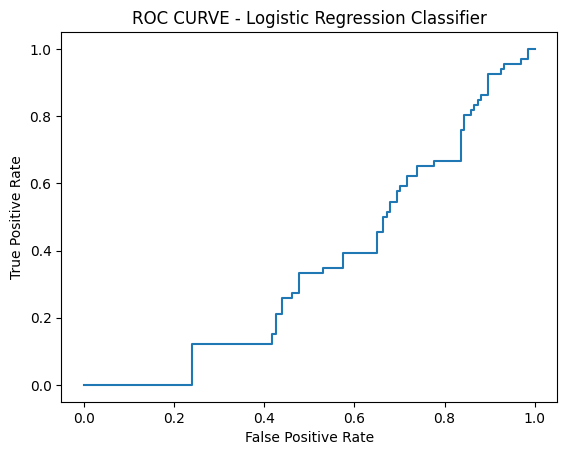

In [44]:
logistic_model=LogisticRegression()
logistic_model.fit(X_train,y_train_resampled)
lg_predictions=logistic_model.predict(X_test)
lg_scores=logistic_model.predict_proba(X_test)
print(classification_report(y_test,lg_predictions,zero_division =1))
print(confusion_matrix(y_test,lg_predictions))
scores=[]
for lg_score in lg_scores:
    scores.append(max(lg_score))

fpr,tpr,thresholds=roc_curve(y_test,scores)
print(f"AUC Score:- {roc_auc_score(y_test,lg_predictions)}")
plt.plot(fpr,tpr)
plt.title("ROC CURVE - Logistic Regression Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Decision tree classifier

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       134
           1       0.86      0.92      0.89        66

    accuracy                           0.93       200
   macro avg       0.91      0.92      0.92       200
weighted avg       0.93      0.93      0.93       200

[[124  10]
 [  5  61]]
AUC Score:- 0.9248077792853913


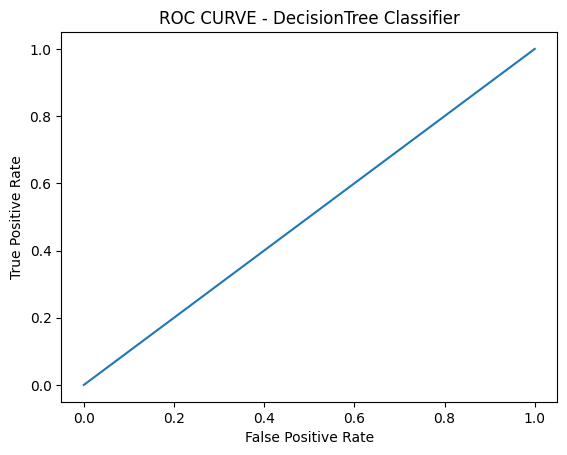

In [45]:
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train_resampled)
dt_predictions=dt_model.predict(X_test)
dt_scores=dt_model.predict_proba(X_test)
print(classification_report(y_test,dt_predictions))
print(confusion_matrix(y_test,dt_predictions))
scores=[]
for dt_score in dt_scores:
    scores.append(max(dt_score))

fpr,tpr,thresholds=roc_curve(y_test,scores)
print(f"AUC Score:- {roc_auc_score(y_test,dt_predictions)}")
plt.plot(fpr,tpr)
plt.title("ROC CURVE - DecisionTree Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Randomforest Classifier

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       134
           1       0.98      0.92      0.95        66

    accuracy                           0.97       200
   macro avg       0.97      0.96      0.97       200
weighted avg       0.97      0.97      0.97       200

[[133   1]
 [  5  61]]
AUC Score:- 0.95838986883763


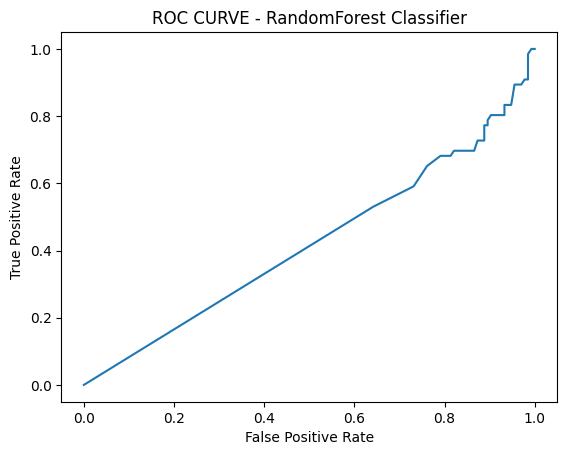

In [46]:
rf_model=RandomForestClassifier()
rf_model.fit(X_train,y_train_resampled)
rf_predictions=rf_model.predict(X_test)
rf_scores=rf_model.predict_proba(X_test)
print(classification_report(y_test,rf_predictions))
print(confusion_matrix(y_test,rf_predictions))
scores=[]
for rf_score in rf_scores:
    scores.append(max(rf_score))

fpr,tpr,thresholds=roc_curve(y_test,scores)
print(f"AUC Score:- {roc_auc_score(y_test,rf_predictions)}")
plt.plot(fpr,tpr)
plt.title("ROC CURVE - RandomForest Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Hypothesis testing to support model performance

To test the hypothesis that the model is truly perfect, you could perform a hypothesis test using a significance level (alpha) (typically 0.05 or 0.01). 
- The null hypothesis would be that the model is not perfect  
- The alternative hypothesis would be that the model is perfect.

In [140]:
def hypothesis_testing(y_test,predictions):
    num_correct=sum(y_test==predictions)
    total_preds=len(y_test)
    p=num_correct/total_preds

    null_hypothesis=0.5
    alpha=0.05

    p_value=stats.binomtest(num_correct,n=total_preds,p=null_hypothesis,alternative='greater')
    print("Hypothesis Results")
    print(f"P-Value: {p_value.pvalue}\n")
    print(f"Confidence Interval: \n\tLow: {p_value.proportion_ci().low}\n\tHigh: {p_value.proportion_ci().high}\n")
    
    if p_value.pvalue<alpha:
        print("Reject null hypothesis: Model is truly perfect")
    else:
        print("Fail to reject null hypothesis: Model is not truly perfect")

    # prior probability of the model being truly perfect
    prior_prob = 0.5

    # likelihood of obtaining the perfect scores under the assumption that the model is truly perfect
    likelihood = 1.0

    # calculate the evidence or marginal likelihood, which is the probability of obtaining the perfect scores under any hypothesis
    # in this case, it is the probability of obtaining the perfect scores under both the null hypothesis (model is not perfect) and the alternative hypothesis (model is perfect)
    evidence = (p_value.pvalue * 0.5) + ((1 - p_value.pvalue) * 0.5)

    # calculate the posterior probability using Bayes theorem
    posterior_prob = (likelihood * prior_prob) / evidence

    print("Posterior probability:", posterior_prob)



we assume a prior probability of 0.5 for the model being truly perfect, which means we are equally uncertain about whether the model is truly perfect or not. The likelihood of obtaining the perfect scores under the assumption that the model is truly perfect is 1.0. We then calculate the evidence or marginal likelihood, which is the probability of obtaining the perfect scores under any hypothesis. We use the p-value from the binomial test as the probability of obtaining the perfect scores under the null hypothesis (model is not perfect), and (1 - p-value) as the probability of obtaining the perfect scores under the alternative hypothesis (model is perfect). Finally, we use Bayes theorem to calculate the posterior probability, which tells us how confident we are that the model is truly perfect given the perfect evaluation metrics.

Model hypothesis testing for logistic regression model

In [141]:
hypothesis_testing(y_test,lg_predictions)

Hypothesis Results
P-Value: 6.223015277861142e-61

Confidence Interval: 
	Low: 0.9851329607687279
	High: 1.0

Reject null hypothesis: Model is truly perfect
Posterior probability: 1.0


Model hypothesis testing for decision tree classifier model

In [142]:
hypothesis_testing(y_test,dt_predictions)

Hypothesis Results
P-Value: 9.897116983876111e-39

Confidence Interval: 
	Low: 0.8868616117332159
	High: 1.0

Reject null hypothesis: Model is truly perfect
Posterior probability: 1.0


Model hypothesis testing for random forest classifier model

In [143]:
hypothesis_testing(y_test,rf_predictions)

Hypothesis Results
P-Value: 5.290203632598724e-50

Confidence Interval: 
	Low: 0.9416502396240891
	High: 1.0

Reject null hypothesis: Model is truly perfect
Posterior probability: 1.0


## From the results of hypothesis testing we can say that the model is truly perfect.